In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mainSimulationAccessTraces.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357952 entries, 0 to 357951
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sourceID                   357952 non-null  object
 1   sourceAddress              357952 non-null  object
 2   sourceType                 357952 non-null  object
 3   sourceLocation             357952 non-null  object
 4   destinationServiceAddress  357952 non-null  object
 5   destinationServiceType     357952 non-null  object
 6   destinationLocation        357952 non-null  object
 7   accessedNodeAddress        357952 non-null  object
 8   accessedNodeType           357804 non-null  object
 9   operation                  357952 non-null  object
 10  value                      355902 non-null  object
 11  timestamp                  357952 non-null  int64 
 12  normality                  357952 non-null  object
dtypes: int64(1), object(12)
memory usage: 35.5+ 

In [3]:
df.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal


In [4]:
df.tail()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,true,1520117997401,normal
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0,1520117998907,normal
357951,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/tempin28,/sensorService,room_9,/agent28/tempin28,/sensorService,read,20.4131,1520117999000,normal


In [5]:
df.shape

(357952, 13)

In [6]:
df.describe()

,timestamp
count,3.579520e+05
mean,1.520078e+12
std,2.465664e+07
min,1.520032e+12
25%,1.520057e+12
50%,1.520080e+12
75%,1.520099e+12
max,1.520118e+12


In [7]:
df.isnull().sum()

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64

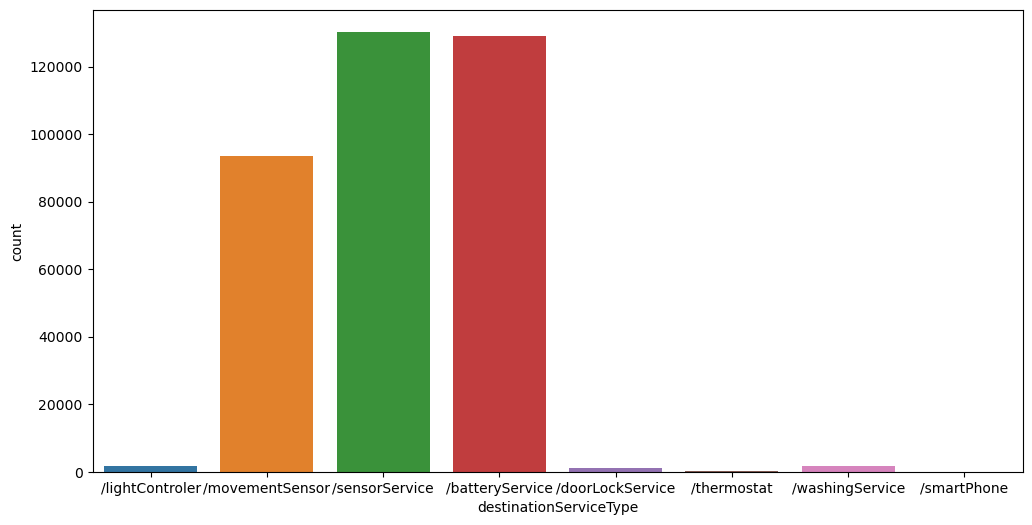

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x='destinationServiceType', data=df)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
fraction_to_keep = 0.1
original_labels = df['normality']
df, _ = train_test_split(df, train_size=fraction_to_keep, stratify=original_labels)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35795 entries, 138866 to 184903
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   sourceID                   35795 non-null  object
 1   sourceAddress              35795 non-null  object
 2   sourceType                 35795 non-null  object
 3   sourceLocation             35795 non-null  object
 4   destinationServiceAddress  35795 non-null  object
 5   destinationServiceType     35795 non-null  object
 6   destinationLocation        35795 non-null  object
 7   accessedNodeAddress        35795 non-null  object
 8   accessedNodeType           35783 non-null  object
 9   operation                  35795 non-null  object
 10  value                      35586 non-null  object
 11  timestamp                  35795 non-null  int64 
 12  normality                  35795 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.8+ MB


In [11]:
unique_values = df.nunique()
unique_values

sourceID                        81
sourceAddress                   85
sourceType                       8
sourceLocation                  21
destinationServiceAddress       79
destinationServiceType           8
destinationLocation             21
accessedNodeAddress            112
accessedNodeType                11
operation                        5
value                         7172
timestamp                    35461
normality                        8
dtype: int64

In [12]:
df.loc[df['value'] == 'twenty', "value"] = 20.0
df.loc[df['value'] == 'false', "value"] = 0
df.loc[df['value'] == 'true', "value"] = 1
df.loc[df['value'] == 'none', "value"] = 0
df.loc[df['value'] == '0', "value"] = 0.0
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['value'] = df['value'].fillna(50.0)
df['value'] = df['value'].astype(float)

In [13]:
df['accessedNodeType'] = df['accessedNodeType'].fillna(value="/Malicious")

In [14]:
duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()

In [15]:
del df['timestamp']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35772 entries, 138866 to 184903
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sourceID                   35772 non-null  object 
 1   sourceAddress              35772 non-null  object 
 2   sourceType                 35772 non-null  object 
 3   sourceLocation             35772 non-null  object 
 4   destinationServiceAddress  35772 non-null  object 
 5   destinationServiceType     35772 non-null  object 
 6   destinationLocation        35772 non-null  object 
 7   accessedNodeAddress        35772 non-null  object 
 8   accessedNodeType           35772 non-null  object 
 9   operation                  35772 non-null  object 
 10  value                      35772 non-null  float64
 11  normality                  35772 non-null  object 
dtypes: float64(1), object(11)
memory usage: 3.5+ MB


In [17]:
df = df.replace({True: 1, False: 0})
df = df.fillna(0)

In [18]:
unique_value_count = df.nunique()
unique_value_count

sourceID                       81
sourceAddress                  85
sourceType                      8
sourceLocation                 21
destinationServiceAddress      79
destinationServiceType          8
destinationLocation            21
accessedNodeAddress           112
accessedNodeType               12
operation                       5
value                        7165
normality                       8
dtype: int64

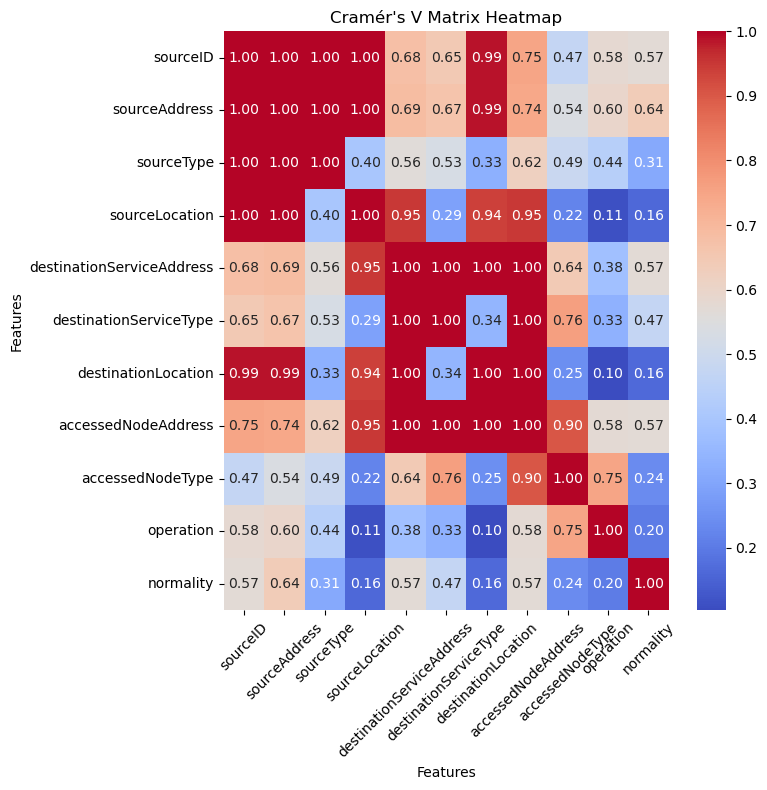

In [19]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

nominal_features = ['sourceID', 'sourceAddress','sourceType','sourceLocation','destinationServiceAddress',
                    'destinationServiceType','destinationLocation','accessedNodeAddress','accessedNodeType','operation',
                    'normality']
contingency_tables = []
for feature1 in nominal_features:
    for feature2 in nominal_features:
        contingency_table = pd.crosstab(df[feature1], df[feature2])
        contingency_tables.append((feature1, feature2, contingency_table))
cramers_vs = []
for feature1, feature2, contingency_table in contingency_tables:
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = (chi2 / (n * min_dim))**0.5
    cramers_vs.append((feature1, feature2, cramers_v))

num_features = len(nominal_features)
cramers_v_matrix = np.zeros((num_features, num_features))
for i in range(num_features):
    for j in range(num_features):
        if i == j:
            cramers_v_matrix[i, j] = 1.0 
        elif i < j:
            feature1 = nominal_features[i]
            feature2 = nominal_features[j]
            cramers_v = next(v for f1, f2, v in cramers_vs if (f1 == feature1 and f2 == feature2) or (f1 == feature2 and f2 == feature1))
            cramers_v_matrix[i, j] = cramers_v
            cramers_v_matrix[j, i] = cramers_v
    
plt.figure(figsize=(8, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=nominal_features, yticklabels=nominal_features)
plt.title("Cramér's V Matrix Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
unique_sourceID=sorted(df.sourceID.unique())
unique_sourceID1=['sourceID'+str(x) for x in unique_sourceID]
unique_sourceAddress=sorted(df.sourceAddress.unique())
unique_sourceAddress1=['sourceAddress'+str(x) for x in unique_sourceAddress]
unique_sourceType=sorted(df.sourceType.unique())
unique_sourceType1=['sourceType'+str(x) for x in unique_sourceType]
unique_sourceLocation=sorted(df.sourceLocation.unique())
unique_sourceLocation1=['sourceLocation'+str(x) for x in unique_sourceLocation]
unique_destinationServiceAddress=sorted(df.destinationServiceAddress.unique())
unique_destinationServiceAddress1=['destinationServiceAddress'+str(x) for x in unique_destinationServiceAddress]
unique_destinationServiceType=sorted(df.destinationServiceType.unique())
unique_destinationServiceType1=['destinationServiceType'+str(x) for x in unique_destinationServiceType]
unique_destinationLocation=sorted(df.destinationLocation.unique())
unique_destinationLocation1=['destinationLocation'+str(x) for x in unique_destinationLocation]
unique_accessedNodeType=sorted(df.accessedNodeType.unique())
unique_accessedNodeType1=['accessedNodeType'+str(x) for x in unique_accessedNodeType]
unique_accessedNodeAddress=sorted(df.accessedNodeAddress.unique())
unique_accessedNodeAddress1=['accessedNodeAddress'+str(x) for x in unique_accessedNodeAddress]
unique_operation=sorted(df.operation.unique())
unique_operation1=['operation'+str(x) for x in unique_operation]
unique_value=sorted(df.value.unique())
unique_value1=['value'+str(x) for x in unique_value]

In [21]:
newcols=(unique_sourceID1+unique_sourceAddress1+unique_sourceType1
         +unique_sourceLocation1+unique_destinationServiceAddress1
         +unique_destinationServiceType1+unique_destinationLocation1
         +unique_accessedNodeAddress1+unique_accessedNodeType1
         +unique_operation1+unique_value1
)
newcols

['sourceIDbattery1',
 'sourceIDbattery2',
 'sourceIDbattery3',
 'sourceIDbattery4',
 'sourceIDbattery5',
 'sourceIDbattery6',
 'sourceIDdoorlock1',
 'sourceIDdoorlock2',
 'sourceIDdoorlock5',
 'sourceIDheatingcontrol1',
 'sourceIDheatingcontrol2',
 'sourceIDheatingcontrol3',
 'sourceIDheatingcontrol4',
 'sourceIDlightcontrol1',
 'sourceIDlightcontrol10',
 'sourceIDlightcontrol11',
 'sourceIDlightcontrol12',
 'sourceIDlightcontrol13',
 'sourceIDlightcontrol14',
 'sourceIDlightcontrol2',
 'sourceIDlightcontrol20',
 'sourceIDlightcontrol21',
 'sourceIDlightcontrol22',
 'sourceIDlightcontrol23',
 'sourceIDlightcontrol24',
 'sourceIDlightcontrol25',
 'sourceIDlightcontrol26',
 'sourceIDlightcontrol27',
 'sourceIDlightcontrol28',
 'sourceIDlightcontrol29',
 'sourceIDlightcontrol3',
 'sourceIDlightcontrol4',
 'sourceIDlightcontrol5',
 'sourceIDlightcontrol6',
 'sourceIDlightcontrol7',
 'sourceIDmovement1',
 'sourceIDmovement10',
 'sourceIDmovement11',
 'sourceIDmovement12',
 'sourceIDmovement

In [22]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,normality
138866,4,15,0,5,14,0,5,21,3,1,0,7
135113,23,44,2,15,42,3,15,58,5,1,1,7
71433,78,84,7,0,72,0,6,102,2,1,12,7
38972,3,9,0,10,8,0,10,12,2,1,2,7
186100,27,57,2,19,55,3,19,79,5,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
276132,77,83,4,0,78,4,0,111,9,4,5215,7
67351,72,62,4,20,59,4,20,84,9,4,744,7
79654,69,53,4,17,50,4,17,71,9,4,4104,7
303128,20,34,2,11,33,4,11,47,9,1,1650,7


In [23]:
import pandas as pd
new_df=pd.DataFrame(columns=newcols)
new_df[unique_sourceID1]=pd.get_dummies(df['sourceID'])
new_df[unique_sourceAddress1]=pd.get_dummies(df['sourceAddress'])
new_df[unique_sourceType1]=pd.get_dummies(df['sourceType'])
new_df[unique_sourceLocation1]=pd.get_dummies(df['sourceLocation'])
new_df[unique_destinationServiceAddress1]=pd.get_dummies(df['destinationServiceAddress'])
new_df[unique_destinationServiceType1]=pd.get_dummies(df['destinationServiceType'])
new_df[unique_destinationLocation1]=pd.get_dummies(df['destinationLocation'])
new_df[unique_accessedNodeAddress1]=pd.get_dummies(df['accessedNodeAddress'])
new_df[unique_accessedNodeType1]=pd.get_dummies(df['accessedNodeType'])
new_df[unique_operation1]=pd.get_dummies(df['operation'])
new_df[unique_value1]=pd.get_dummies(df['value'])
new_df=new_df.astype(int)
df=pd.concat([df,new_df],axis=1)
df.drop(['sourceID','sourceAddress','sourceType','sourceLocation','destinationServiceAddress',
        'destinationServiceType','destinationLocation','accessedNodeAddress',
        'accessedNodeType','operation','value'],axis=1,inplace=True)

In [24]:
unique_value_count=df.nunique()
unique_value_count

normality               8
sourceIDbattery1        2
sourceIDbattery2        2
sourceIDbattery3        2
sourceIDbattery4        2
                       ..
value1521224807509.0    2
value1521224872685.0    2
value1521224924160.0    2
value1521224940194.0    2
value1521225110950.0    2
Length: 7598, dtype: int64

In [25]:
df

,normality,sourceIDbattery1,sourceIDbattery2,sourceIDbattery3,sourceIDbattery4,sourceIDbattery5,sourceIDbattery6,sourceIDdoorlock1,sourceIDdoorlock2,sourceIDdoorlock5,...,value1521224133045.0,value1521224165976.0,value1521224312528.0,value1521224484464.0,value1521224709357.0,value1521224807509.0,value1521224872685.0,value1521224924160.0,value1521224940194.0,value1521225110950.0
138866,7,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135113,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71433,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38972,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
186100,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276132,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67351,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79654,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303128,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
xdf = df.drop('normality', axis=1)
ydf = df['normality']

In [27]:
col_names = xdf.columns

In [28]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35772 entries, 138866 to 184903
Columns: 7597 entries, sourceIDbattery1 to value1521225110950.0
dtypes: int32(7597)
memory usage: 1.0 GB


In [29]:
from tensorflow.keras import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [30]:
dense_array = xdf.astype('int16').values
scaler = MinMaxScaler()
xdf = scaler.fit_transform(dense_array)

In [31]:
xdf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xdf,ydf,test_size=0.2,random_state=42)
len(x_train)

28617

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif

k_best = SelectKBest(score_func = f_classif,k=500)
x_train = k_best.fit_transform(x_train,y_train)
selected_feature_indices=k_best.get_support(indices=True)
selected_feature_names= [col_names[i] for i in selected_feature_indices]
print("Selected Features:",selected_feature_names)
x_test=k_best.transform(x_test)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   8   34  111  118  304  458  473  476  488  492  501  506  511  515
  529  538  540  544  545  548  557  558  577  579  600  612  617  640
  641  645  648  650  651  652  667  671  683  691  692  704  743  773
  789  805  822  835  838  845  851  856  915  917  920  927  934  935
  937  938  964  965  973  978  985  997  998 1003 1025 1035 1046 1061
 1084 1106 1108 1124 1136 1137 1141 1143 1151 1173 1211 1212 1220 1222
 1226 1230 1245 1257 1266 1267 1281 1293 1297 1306 1314 1324 1348 1363
 1365 1379 1384 1387 1397 1405 1408 1410 1420 1425 1432 1438 1443 1444
 1447 1454 1471 1472 1476 1481 1486 1495 1503 1525 1533 1535 1543 1546
 1547 1548 1552 1558 1564 1577 1579 1580 1584 1593 1598 1620 1622 1630
 1638 1645 1646 1653 1673 1703 1709 1714 1731 1750 1764 1770 1777 1779
 1784 1793 1807 1811 1818 1829 1830 1832 1833 1846 1851 1859 1861 1878
 1879 1888 1910 1913 1919 19

Selected Features: ['sourceIDbattery1', 'sourceIDbattery2', 'sourceIDbattery3', 'sourceIDbattery4', 'sourceIDbattery5', 'sourceIDbattery6', 'sourceIDdoorlock1', 'sourceIDdoorlock2', 'sourceIDheatingcontrol1', 'sourceIDheatingcontrol2', 'sourceIDheatingcontrol3', 'sourceIDheatingcontrol4', 'sourceIDlightcontrol1', 'sourceIDlightcontrol10', 'sourceIDlightcontrol11', 'sourceIDlightcontrol12', 'sourceIDlightcontrol13', 'sourceIDlightcontrol14', 'sourceIDlightcontrol2', 'sourceIDlightcontrol20', 'sourceIDlightcontrol21', 'sourceIDlightcontrol22', 'sourceIDlightcontrol23', 'sourceIDlightcontrol24', 'sourceIDlightcontrol25', 'sourceIDlightcontrol26', 'sourceIDlightcontrol27', 'sourceIDlightcontrol28', 'sourceIDlightcontrol29', 'sourceIDlightcontrol3', 'sourceIDlightcontrol4', 'sourceIDlightcontrol5', 'sourceIDlightcontrol6', 'sourceIDlightcontrol7', 'sourceIDmovement10', 'sourceIDmovement12', 'sourceIDmovement2', 'sourceIDmovement21', 'sourceIDmovement25', 'sourceIDmovement26', 'sourceIDmovem

In [34]:
#LGBM-IDS

import numpy as py
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import time

In [35]:
model=lgb.LGBMClassifier(
    boosting_type='gbdt',
    max_depth=2,
    n_estimators=100,
    num_leaves=3,
    learning_rate=0.05,

)
start_time=time.time()
model.fit(x_train,y_train)
end_time=time.time()
run_time=end_time-start_time
print("run time in seconds:",run_time)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print("Classification report:")
print(classification_report(y_test,y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 580
[LightGBM] [Info] Number of data points in the train set: 28617, number of used features: 290
[LightGBM] [Info] Start training from score -4.177257
[LightGBM] [Info] Start training from score -6.965919
[LightGBM] [Info] Start training from score -5.971297
[LightGBM] [Info] Start training from score -6.042249
[LightGBM] [Info] Start training from score -5.417569
[LightGBM] [Info] Start training from score -6.524087
[LightGBM] [Info] Start training from score -8.315846
[LightGBM] [Info] Start training from score -0.027743
run time in seconds: 2.705779790878296
Accuracy:0.993151642208246
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76       117
           1     

In [36]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

y_test_bin=label_binarize(y_test,classes=[0,1,2,3,4,5,6,7])
y_prob=model.predict_proba(x_test)

class_names = {
    0: 'DoS attack',
    1: 'data probing',
    2: 'malicious control',
    3: 'malicious operation',
    4: 'scan',
    5: 'spying',
    6: 'wrong setup',
    7: 'normal'
}

fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(len(class_names)):
    fpr[i],tpr[i],_=roc_curve(y_test_bin[:,i],y_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

for i,class_name in class_names.items():
    print(f"{class_name} -ROC AUC: {roc_auc[i]}")

DoS attack -ROC AUC: 0.9984079101726161
data probing -ROC AUC: 1.0
malicious control -ROC AUC: 1.0
malicious operation -ROC AUC: 1.0
scan -ROC AUC: 0.9999948040071497
spying -ROC AUC: 1.0
wrong setup -ROC AUC: 0.9999999999999999
normal -ROC AUC: 0.9989867767770997


In [37]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.preprocessing import label_binarize
y_test_bin=label_binarize(y_test,classes=list(class_names.keys()))
y_prob=model.predict_proba(x_test)
fpr_micro,tpr_micro,_=roc_curve(y_test_bin.ravel(),y_prob.ravel())
roc_auc_micro=auc(fpr_micro,tpr_micro)
print(f"Micro-Averaged ROC AUC:{roc_auc_micro}")

Micro-Averaged ROC AUC:0.9999855898362023


In [38]:
import time
start_time=time.time()
model.fit(x_train,y_train)
end_time=time.time()
runtime=end_time-start_time
print('Runtime: %.3f seconds' % runtime)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 580
[LightGBM] [Info] Number of data points in the train set: 28617, number of used features: 290
[LightGBM] [Info] Start training from score -4.177257
[LightGBM] [Info] Start training from score -6.965919
[LightGBM] [Info] Start training from score -5.971297
[LightGBM] [Info] Start training from score -6.042249
[LightGBM] [Info] Start training from score -5.417569
[LightGBM] [Info] Start training from score -6.524087
[LightGBM] [Info] Start training from score -8.315846
[LightGBM] [Info] Start training from score -0.027743
Runtime: 2.155 seconds


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_train_pred = model.predict(x_train)
mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.03421043435720027
Mean Squared Error: 0.2375860502498515
Root Mean Squared Error: 0.4874279949385873


In [40]:
from sklearn.model_selection import cross_val_score
import numpy as np
import time
scores = cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
mean_accuracy = np.mean(scores)
print("Mean Accuracy:",mean_accuracy)
std_dev=np.std(scores)
print("Standard Deviation:",std_dev)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 22893, number of used features: 284
[LightGBM] [Info] Start training from score -4.177800
[LightGBM] [Info] Start training from score -6.947544
[LightGBM] [Info] Start training from score -5.978143
[LightGBM] [Info] Start training from score -6.049602
[LightGBM] [Info] Start training from score -5.413614
[LightGBM] [Info] Start training from score -6.512226
[LightGBM] [Info] Start training from score -8.429149
[LightGBM] [Info] Start training from score -0.027725
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_w

In [41]:
import time
start_time=time.time()
model.fit(x_train,y_train)
end_time=time.time()
run_time=end_time-start_time
print("Run time in seconds:",run_time)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 580
[LightGBM] [Info] Number of data points in the train set: 28617, number of used features: 290
[LightGBM] [Info] Start training from score -4.177257
[LightGBM] [Info] Start training from score -6.965919
[LightGBM] [Info] Start training from score -5.971297
[LightGBM] [Info] Start training from score -6.042249
[LightGBM] [Info] Start training from score -5.417569
[LightGBM] [Info] Start training from score -6.524087
[LightGBM] [Info] Start training from score -8.315846
[LightGBM] [Info] Start training from score -0.027743
Run time in seconds: 1.7667832374572754


In [42]:
y_train_pred=model.predict(x_train)
tpdr=np.mean(y_train_pred==y_train)
print("Threat prediction and detection rate:",tpdr)

Threat prediction and detection rate: 0.9950029702624315


In [43]:
from sklearn.metrics import classification_report
y_train_pred=model.predict(x_train)
report=classification_report(y_train,y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.69      0.81       439
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        68
           4       0.99      0.97      0.98       127
           5       1.00      0.98      0.99        42
           6       1.00      1.00      1.00         7
           7       0.99      1.00      1.00     27834

    accuracy                           1.00     28617
   macro avg       1.00      0.95      0.97     28617
weighted avg       1.00      1.00      0.99     28617



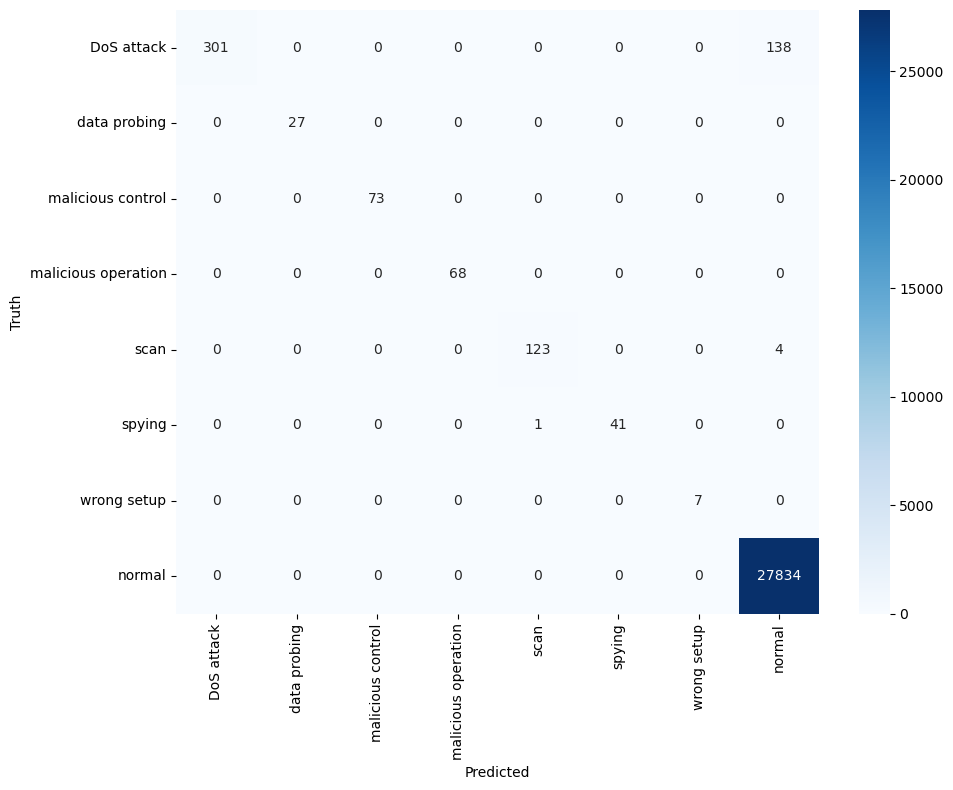

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_train_pred = model.predict(x_train)
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.tight_layout()
plt.savefig('confusionMatrix.png')
plt.show()

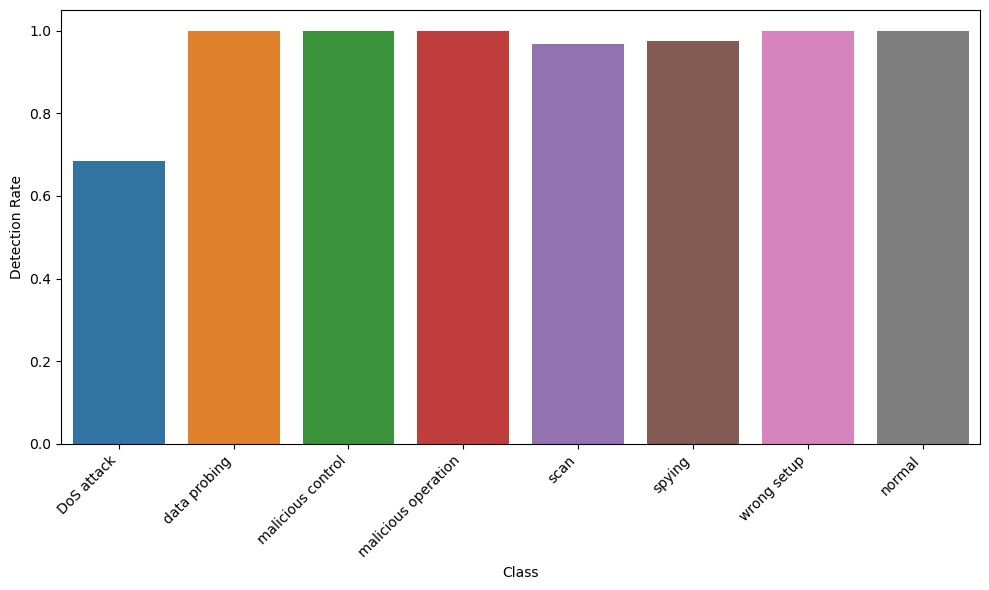

In [45]:
detection_rate=cm.diagonal()/cm.sum(axis=1)
class_labels=list(range(8))
plt.figure(figsize=(10,6))
sns.barplot(x=[class_names[label] for label in class_labels],y=detection_rate)
plt.xlabel('Class')
plt.ylabel('Detection Rate')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.savefig('barplot.png',dpi=300)
plt.show()

In [46]:
from sklearn.metrics import precision_recall_fscore_support
y_train_pred=model.predict(x_train)
precision,recall,f1_score,support=precision_recall_fscore_support(y_train,y_train_pred,average=None)
for i in range(8):
    print(f"Class {i}: Precision={precision[i]},Recall={recall[i]},F1-Score={f1_score[i]}")

Class 0: Precision=1.0,Recall=0.6856492027334852,F1-Score=0.8135135135135134
Class 1: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 2: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 3: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 4: Precision=0.9919354838709677,Recall=0.968503937007874,F1-Score=0.9800796812749005
Class 5: Precision=1.0,Recall=0.9761904761904762,F1-Score=0.9879518072289156
Class 6: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 7: Precision=0.994924220760652,Recall=1.0,F1-Score=0.9974556531087618


<Figure size 1200x800 with 0 Axes>

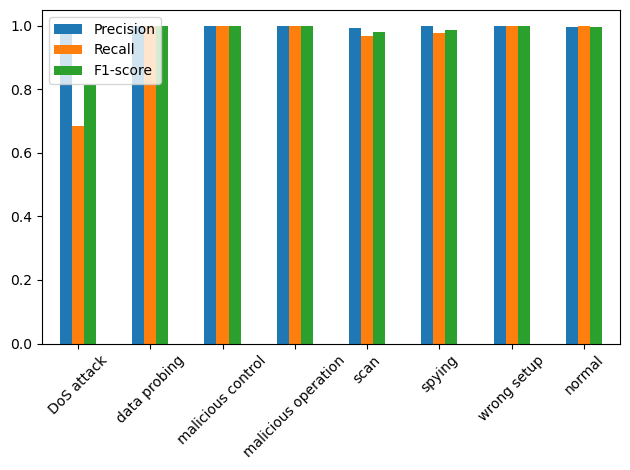

In [47]:
df=pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
},index=[class_names[label] for label in range(8)])
plt.figure(figsize=(12,8))
ax=df.plot.bar(rot=45)
plt.tight_layout()
plt.savefig('metrics_barplot.png',dpi=300)
plt.show()

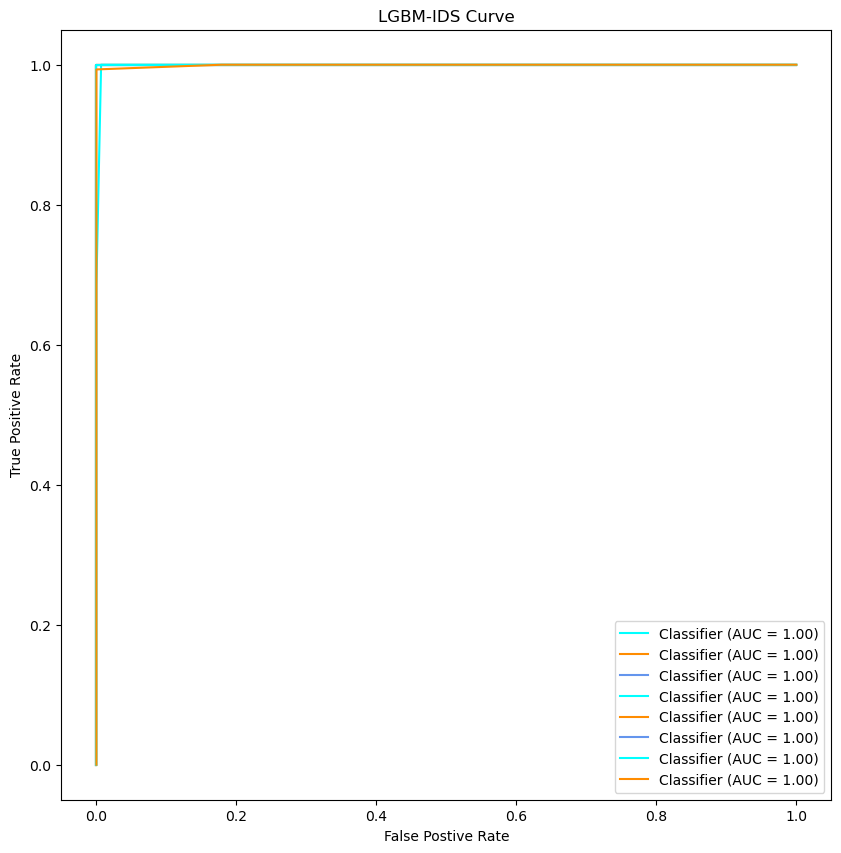

In [48]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

y_train_bin=label_binarize(y_train,classes=[0,1,2,3,4,5,6,7])
y_train_prob=model.predict_proba(x_train)
n_classes=y_train_bin.shape[1]
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_train_bin[:,i],y_train_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    
attack_names={
    0: 'anomalous(DoS attack)',
    1: 'anomalous(data probing)',
    2: 'anomalous(malicious control)',
    3: 'anomalous(malicious operation)',
    4: 'anomalous(scan)',
    5: 'anomalous(spying)',
    6: 'anomalous(wrong setup)',
    7: 'normal',
}
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
colors=cycle(['aqua','darkorange','cornflowerblue'])
fig,ax=plt.subplots(figsize=(10,10))
for i,color in zip(range(n_classes),colors):
    RocCurveDisplay.from_predictions(
    y_train_bin[:,i],
    y_train_prob[:,i],
    color=color,
    ax=ax,
    )
plt.axis("square")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("LGBM-IDS Curve")
plt.legend(loc="lower right")
fig.savefig("LGBM-IDS.png")
plt.show()

In [49]:
#XGBM
import xgboost as xgb
params = {
    'objective': 'multi:softmax', 
    'eval_metric': 'error',
    'eta': 0.1,
    'num_class' : 8,
    'max_depth': 6
}
xgb_model = xgb.XGBClassifier(**params, n_estimators=100)
start_time=time.time()
xgb_model.fit(x_train,y_train)
end_time=time.time()
run_time=end_time-start_time
print("run time in seconds:",run_time)
y_pred=xgb_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print("Classification report:")
print(classification_report(y_test,y_pred))

run time in seconds: 16.040109872817993
Accuracy:0.9934311670160727
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76       117
           1       1.00      1.00      1.00         7
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         5
           7       0.99      1.00      1.00      6959

    accuracy                           0.99      7155
   macro avg       0.99      0.95      0.97      7155
weighted avg       0.99      0.99      0.99      7155



In [50]:
y_test_bin=label_binarize(y_test,classes=[0,1,2,3,4,5,6,7])
y_prob=xgb_model.predict_proba(x_test)

fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(len(class_names)):
    fpr[i],tpr[i],_=roc_curve(y_test_bin[:,i],y_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

for i,class_name in class_names.items():
    print(f"{class_name} -ROC AUC: {roc_auc[i]}")

y_test_bin=label_binarize(y_test,classes=list(class_names.keys()))
y_prob=xgb_model.predict_proba(x_test)
fpr_micro,tpr_micro,_=roc_curve(y_test_bin.ravel(),y_prob.ravel())
roc_auc_micro=auc(fpr_micro,tpr_micro)
print(f"Micro-Averaged ROC AUC:{roc_auc_micro}")

DoS attack -ROC AUC: 0.9984079101726161
data probing -ROC AUC: 1.0
malicious control -ROC AUC: 1.0
malicious operation -ROC AUC: 1.0
scan -ROC AUC: 1.0
spying -ROC AUC: 1.0
wrong setup -ROC AUC: 1.0
normal -ROC AUC: 0.9990021730778817
Micro-Averaged ROC AUC:0.9999861786325929


In [51]:
start_time=time.time()
xgb_model.fit(x_train,y_train)
end_time=time.time()
runtime=end_time-start_time
print('Runtime: %.3f seconds' % runtime)

Runtime: 15.859 seconds


In [52]:
y_train_pred = xgb_model.predict(x_train)
mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.033756158926512216
Mean Squared Error: 0.2362931124855855
Root Mean Squared Error: 0.4860998996971564


In [53]:
scores = cross_val_score(xgb_model,x_train,y_train,cv=5,scoring='accuracy')
mean_accuracy = np.mean(scores)
print("Mean Accuracy:",mean_accuracy)
std_dev=np.std(scores)
print("Standard Deviation:",std_dev)

Mean Accuracy: 0.9949331000133951
Standard Deviation: 0.0005181295373701045


In [54]:
start_time=time.time()
xgb_model.fit(x_train,y_train)
end_time=time.time()
run_time=end_time-start_time
print("Run time in seconds:",run_time)

Run time in seconds: 14.262767314910889


In [55]:
y_train_pred=xgb_model.predict(x_train)
tpdr=np.mean(y_train_pred==y_train)
print("Threat prediction and detection rate:",tpdr)

Threat prediction and detection rate: 0.9951776915819268


In [56]:
y_train_pred=xgb_model.predict(x_train)
report=classification_report(y_train,y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.69      0.81       439
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        68
           4       1.00      1.00      1.00       127
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00     27834

    accuracy                           1.00     28617
   macro avg       1.00      0.96      0.98     28617
weighted avg       1.00      1.00      0.99     28617



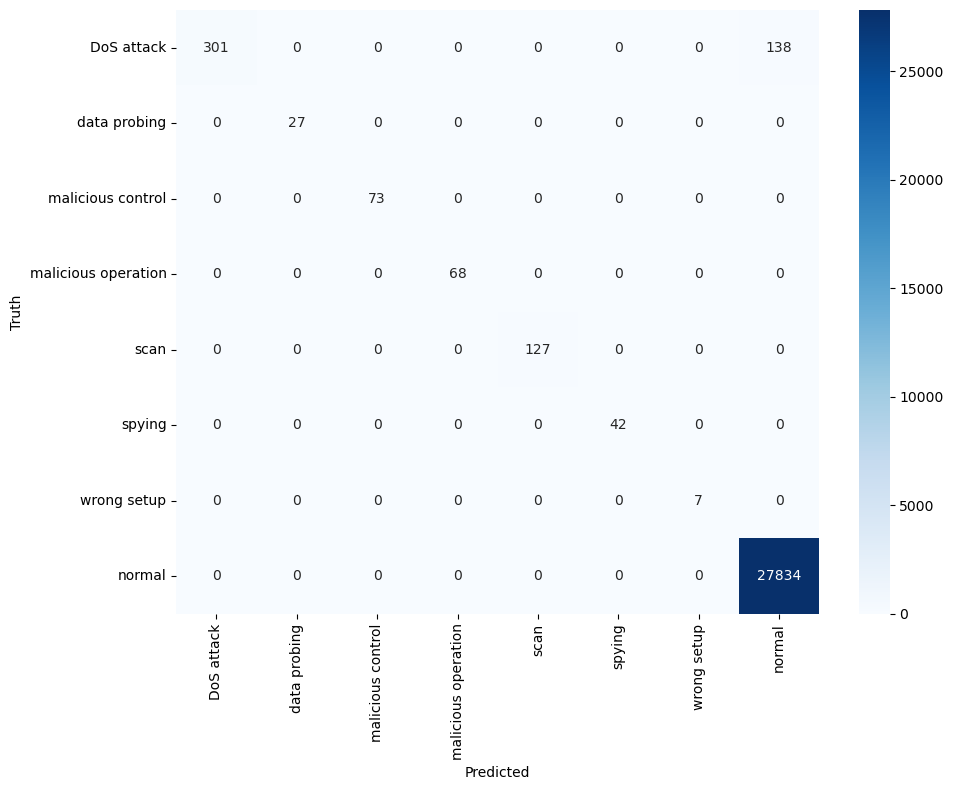

In [57]:
y_train_pred = xgb_model.predict(x_train)
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.tight_layout()
plt.savefig('XGB_confusionMatrix.png')
plt.show()

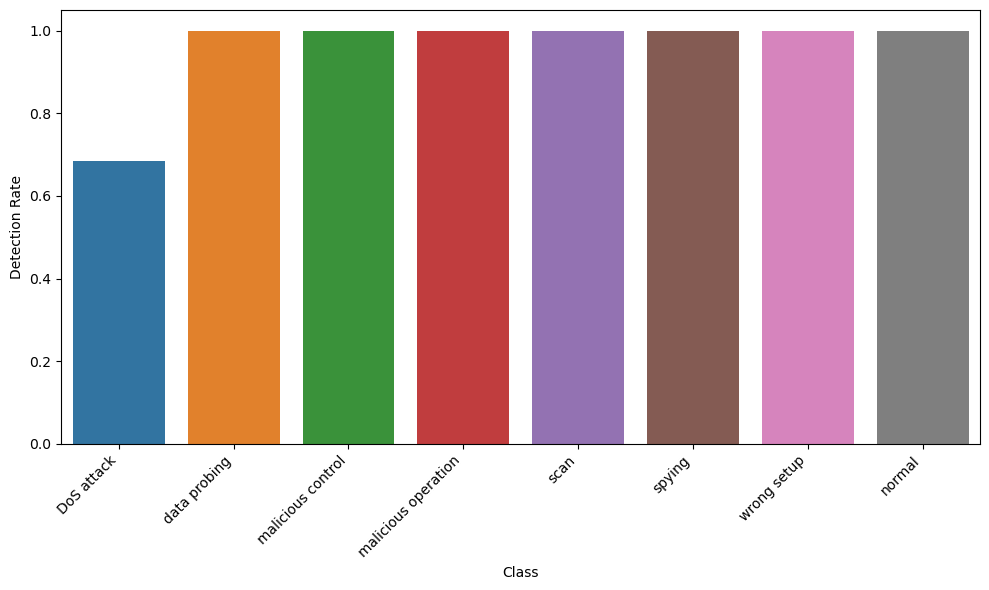

In [58]:
detection_rate=cm.diagonal()/cm.sum(axis=1)
class_labels=list(range(8))
plt.figure(figsize=(10,6))
sns.barplot(x=[class_names[label] for label in class_labels],y=detection_rate)
plt.xlabel('Class')
plt.ylabel('Detection Rate')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.savefig('XGB_barplot.png',dpi=300)
plt.show()

Class 0: Precision=1.0,Recall=0.6856492027334852,F1-Score=0.8135135135135134
Class 1: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 2: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 3: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 4: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 5: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 6: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 7: Precision=0.995066495066495,Recall=1.0,F1-Score=0.9975271476185357


<Figure size 1200x800 with 0 Axes>

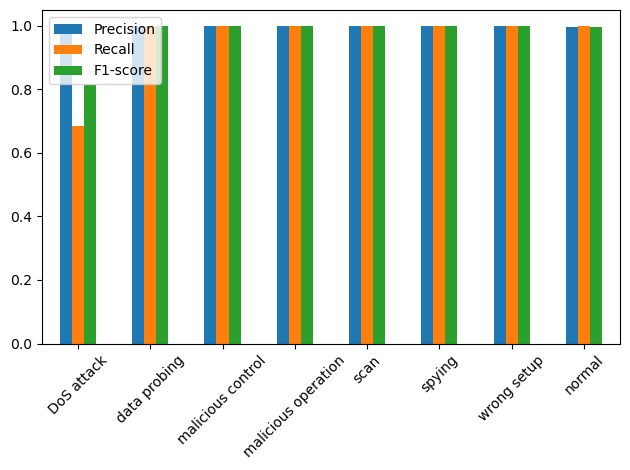

In [59]:
y_train_pred=xgb_model.predict(x_train)
precision,recall,f1_score,support=precision_recall_fscore_support(y_train,y_train_pred,average=None)
for i in range(8):
    print(f"Class {i}: Precision={precision[i]},Recall={recall[i]},F1-Score={f1_score[i]}")

df=pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
},index=[class_names[label] for label in range(8)])
plt.figure(figsize=(12,8))
ax=df.plot.bar(rot=45)
plt.tight_layout()
plt.savefig('XGB_metrics_barplot.png',dpi=300)
plt.show()

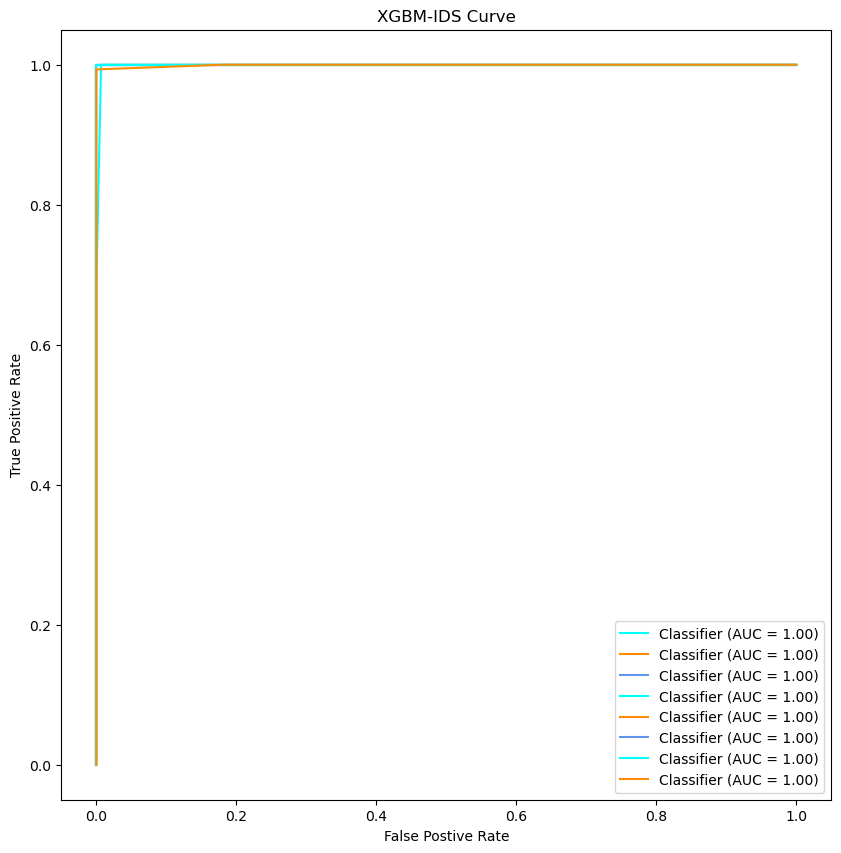

In [60]:
y_train_bin=label_binarize(y_train,classes=[0,1,2,3,4,5,6,7])
y_train_prob=xgb_model.predict_proba(x_train)
n_classes=y_train_bin.shape[1]
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_train_bin[:,i],y_train_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    
attack_names={
    0: 'anomalous(DoS attack)',
    1: 'anomalous(data probing)',
    2: 'anomalous(malicious control)',
    3: 'anomalous(malicious operation)',
    4: 'anomalous(scan)',
    5: 'anomalous(spying)',
    6: 'anomalous(wrong setup)',
    7: 'normal',
}

colors=cycle(['aqua','darkorange','cornflowerblue'])
fig,ax=plt.subplots(figsize=(10,10))
for i,color in zip(range(n_classes),colors):
    RocCurveDisplay.from_predictions(
    y_train_bin[:,i],
    y_train_prob[:,i],
    color=color,
    ax=ax,
    )
plt.axis("square")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBM-IDS Curve")
plt.legend(loc="lower right")
fig.savefig("XGBM-IDS.png")
plt.show()

In [61]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)
start_time=time.time()
rf_model.fit(x_train,y_train)
end_time=time.time()
run_time=end_time-start_time
print("run time in seconds:",run_time)
y_pred=rf_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print("Classification report:")
print(classification_report(y_test,y_pred))

run time in seconds: 12.031686305999756
Accuracy:0.9934311670160727
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76       117
           1       1.00      1.00      1.00         7
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         5
           7       0.99      1.00      1.00      6959

    accuracy                           0.99      7155
   macro avg       0.99      0.95      0.97      7155
weighted avg       0.99      0.99      0.99      7155



In [62]:
y_test_bin=label_binarize(y_test,classes=[0,1,2,3,4,5,6,7])
y_prob=rf_model.predict_proba(x_test)

fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(len(class_names)):
    fpr[i],tpr[i],_=roc_curve(y_test_bin[:,i],y_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

for i,class_name in class_names.items():
    print(f"{class_name} -ROC AUC: {roc_auc[i]}")

y_test_bin=label_binarize(y_test,classes=list(class_names.keys()))
y_prob=rf_model.predict_proba(x_test)
fpr_micro,tpr_micro,_=roc_curve(y_test_bin.ravel(),y_prob.ravel())
roc_auc_micro=auc(fpr_micro,tpr_micro)
print(f"Micro-Averaged ROC AUC:{roc_auc_micro}")

DoS attack -ROC AUC: 0.9984079101726161
data probing -ROC AUC: 1.0
malicious control -ROC AUC: 1.0
malicious operation -ROC AUC: 1.0
scan -ROC AUC: 1.0
spying -ROC AUC: 1.0
wrong setup -ROC AUC: 1.0
normal -ROC AUC: 0.999003639392242
Micro-Averaged ROC AUC:0.9999864744260404


In [63]:
start_time=time.time()
rf_model.fit(x_train,y_train)
end_time=time.time()
run_time=end_time-start_time
print("Run time in seconds:",run_time)

Run time in seconds: 10.829935789108276


In [64]:
y_train_pred = rf_model.predict(x_train)
mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.033756158926512216
Mean Squared Error: 0.2362931124855855
Root Mean Squared Error: 0.4860998996971564


In [65]:
scores = cross_val_score(rf_model,x_train,y_train,cv=5,scoring='accuracy')
mean_accuracy = np.mean(scores)
print("Mean Accuracy:",mean_accuracy)
std_dev=np.std(scores)
print("Standard Deviation:",std_dev)

Mean Accuracy: 0.9946884974906629
Standard Deviation: 0.0006307071383423672


In [66]:
start_time=time.time()
rf_model.fit(x_train,y_train)
end_time=time.time()
run_time=end_time-start_time
print("Run time in seconds:",run_time)

Run time in seconds: 12.476620197296143


In [67]:
y_train_pred=rf_model.predict(x_train)
tpdr=np.mean(y_train_pred==y_train)
print("Threat prediction and detection rate:",tpdr)
report=classification_report(y_train,y_train_pred)
print(report)

Threat prediction and detection rate: 0.9951776915819268
              precision    recall  f1-score   support

           0       1.00      0.69      0.81       439
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        68
           4       1.00      1.00      1.00       127
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00     27834

    accuracy                           1.00     28617
   macro avg       1.00      0.96      0.98     28617
weighted avg       1.00      1.00      0.99     28617



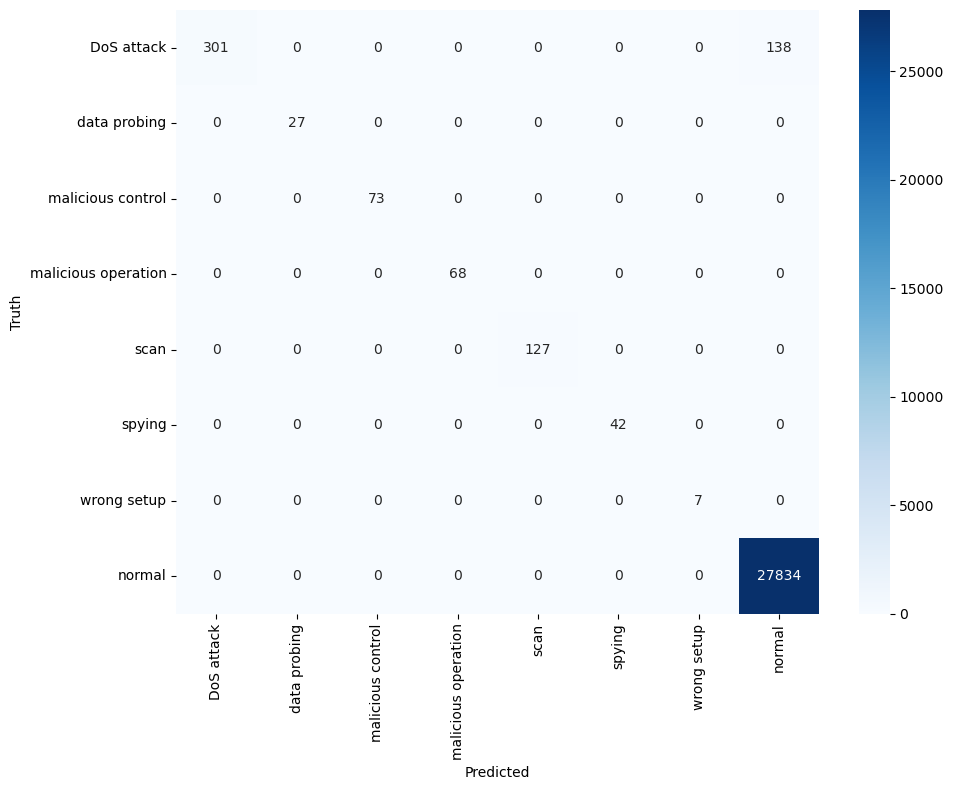

In [68]:
y_train_pred = rf_model.predict(x_train)
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.tight_layout()
plt.savefig('RF_confusionMatrix.png')
plt.show()

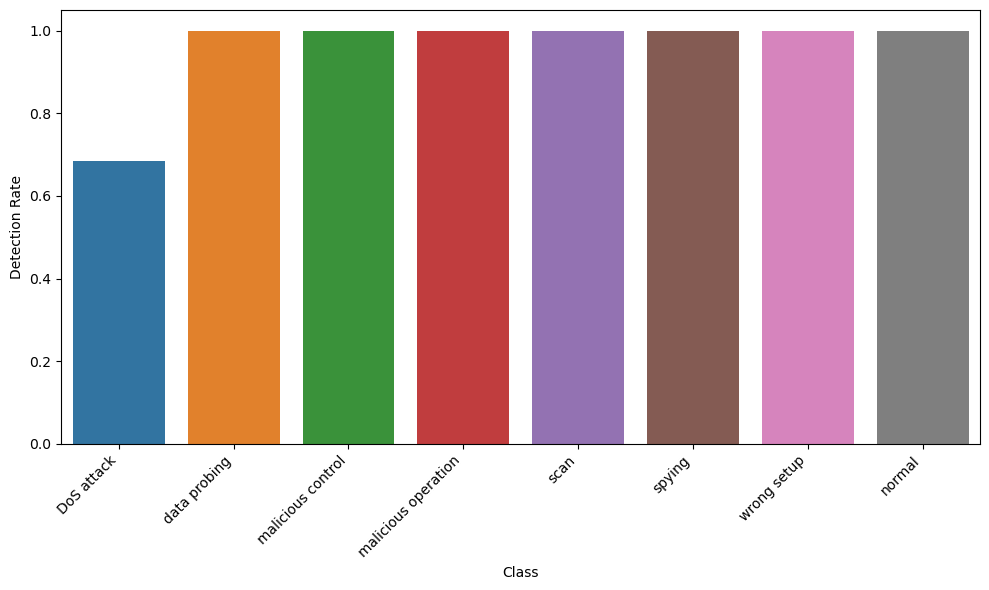

In [69]:
detection_rate=cm.diagonal()/cm.sum(axis=1)
class_labels=list(range(8))
plt.figure(figsize=(10,6))
sns.barplot(x=[class_names[label] for label in class_labels],y=detection_rate)
plt.xlabel('Class')
plt.ylabel('Detection Rate')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.savefig('RF_barplot.png',dpi=300)
plt.show()

Class 0: Precision=1.0,Recall=0.6856492027334852,F1-Score=0.8135135135135134
Class 1: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 2: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 3: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 4: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 5: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 6: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 7: Precision=0.995066495066495,Recall=1.0,F1-Score=0.9975271476185357


<Figure size 1200x800 with 0 Axes>

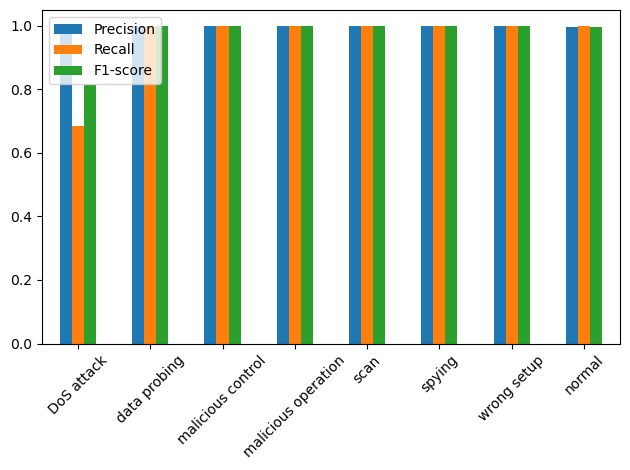

In [70]:
y_train_pred=rf_model.predict(x_train)
precision,recall,f1_score,support=precision_recall_fscore_support(y_train,y_train_pred,average=None)
for i in range(8):
    print(f"Class {i}: Precision={precision[i]},Recall={recall[i]},F1-Score={f1_score[i]}")

df=pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
},index=[class_names[label] for label in range(8)])
plt.figure(figsize=(12,8))
ax=df.plot.bar(rot=45)
plt.tight_layout()
plt.savefig('RF_metrics_barplot.png',dpi=300)
plt.show()

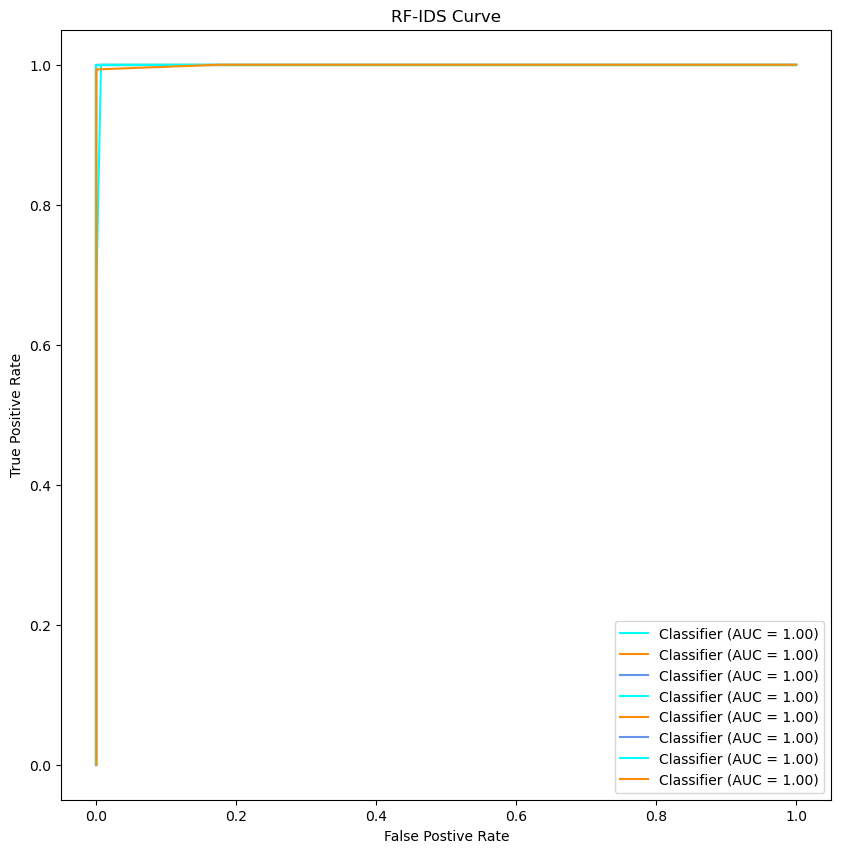

In [71]:
y_train_bin=label_binarize(y_train,classes=[0,1,2,3,4,5,6,7])
y_train_prob=rf_model.predict_proba(x_train)
n_classes=y_train_bin.shape[1]
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_train_bin[:,i],y_train_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    
attack_names={
    0: 'anomalous(DoS attack)',
    1: 'anomalous(data probing)',
    2: 'anomalous(malicious control)',
    3: 'anomalous(malicious operation)',
    4: 'anomalous(scan)',
    5: 'anomalous(spying)',
    6: 'anomalous(wrong setup)',
    7: 'normal',
}

colors=cycle(['aqua','darkorange','cornflowerblue'])
fig,ax=plt.subplots(figsize=(10,10))
for i,color in zip(range(n_classes),colors):
    RocCurveDisplay.from_predictions(
    y_train_bin[:,i],
    y_train_prob[:,i],
    color=color,
    ax=ax,
    )
plt.axis("square")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("RF-IDS Curve")
plt.legend(loc="lower right")
fig.savefig("RF-IDS.png")
plt.show()

In [72]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial',solver='saga',C=1.0,max_iter=1000,penalty='l2')
start_time=time.time()
lr_model.fit(x_train,y_train)
end_time=time.time()
run_time=end_time-start_time
print("run time in seconds:",run_time)
y_pred=lr_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print("LR_Classification report:")
print(classification_report(y_test,y_pred))

run time in seconds: 182.53582334518433
Accuracy:0.993151642208246
LR_Classification report:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76       117
           1       1.00      1.00      1.00         7
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        13
           4       1.00      0.93      0.96        27
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         5
           7       0.99      1.00      1.00      6959

    accuracy                           0.99      7155
   macro avg       0.99      0.94      0.96      7155
weighted avg       0.99      0.99      0.99      7155



In [73]:
y_test_bin=label_binarize(y_test,classes=[0,1,2,3,4,5,6,7])
y_prob=lr_model.predict_proba(x_test)

fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(len(class_names)):
    fpr[i],tpr[i],_=roc_curve(y_test_bin[:,i],y_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

for i,class_name in class_names.items():
    print(f"{class_name} -ROC AUC: {roc_auc[i]}")

y_test_bin=label_binarize(y_test,classes=list(class_names.keys()))
y_prob=lr_model.predict_proba(x_test)
fpr_micro,tpr_micro,_=roc_curve(y_test_bin.ravel(),y_prob.ravel())
roc_auc_micro=auc(fpr_micro,tpr_micro)
print(f"Micro-Averaged ROC AUC:{roc_auc_micro}")

DoS attack -ROC AUC: 0.998407910172616
data probing -ROC AUC: 1.0
malicious control -ROC AUC: 1.0
malicious operation -ROC AUC: 1.0
scan -ROC AUC: 0.9999792160285987
spying -ROC AUC: 1.0
wrong setup -ROC AUC: 1.0
normal -ROC AUC: 0.9988724042570037
Micro-Averaged ROC AUC:0.9999837397319037


In [74]:
start_time=time.time()
lr_model.fit(x_train,y_train)
end_time=time.time()
runtime=end_time-start_time
print('Runtime: %.3f seconds' % runtime)

Runtime: 192.809 seconds


In [75]:
y_train_pred = lr_model.predict(x_train)
mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.0339658245099067
Mean Squared Error: 0.23692210923576895
Root Mean Squared Error: 0.486746452720273


In [76]:
scores = cross_val_score(lr_model,x_train,y_train,cv=5,scoring='accuracy')
mean_accuracy = np.mean(scores)
print("Mean Accuracy:",mean_accuracy)
std_dev=np.std(scores)
print("Standard Deviation:",std_dev)

Mean Accuracy: 0.9945836756877279
Standard Deviation: 0.0006149327959644233


In [77]:
start_time=time.time()
lr_model.fit(x_train,y_train)
end_time=time.time()
run_time=end_time-start_time
print("Run time in seconds:",run_time)

Run time in seconds: 190.98461651802063


In [78]:
y_train_pred=lr_model.predict(x_train)
tpdr=np.mean(y_train_pred==y_train)
print("Threat prediction and detection rate:",tpdr)
report=classification_report(y_train,y_train_pred)
print(report)

Threat prediction and detection rate: 0.9951078030541287
              precision    recall  f1-score   support

           0       1.00      0.69      0.81       439
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        68
           4       1.00      0.98      0.99       127
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00         7
           7       0.99      1.00      1.00     27834

    accuracy                           1.00     28617
   macro avg       1.00      0.96      0.98     28617
weighted avg       1.00      1.00      0.99     28617



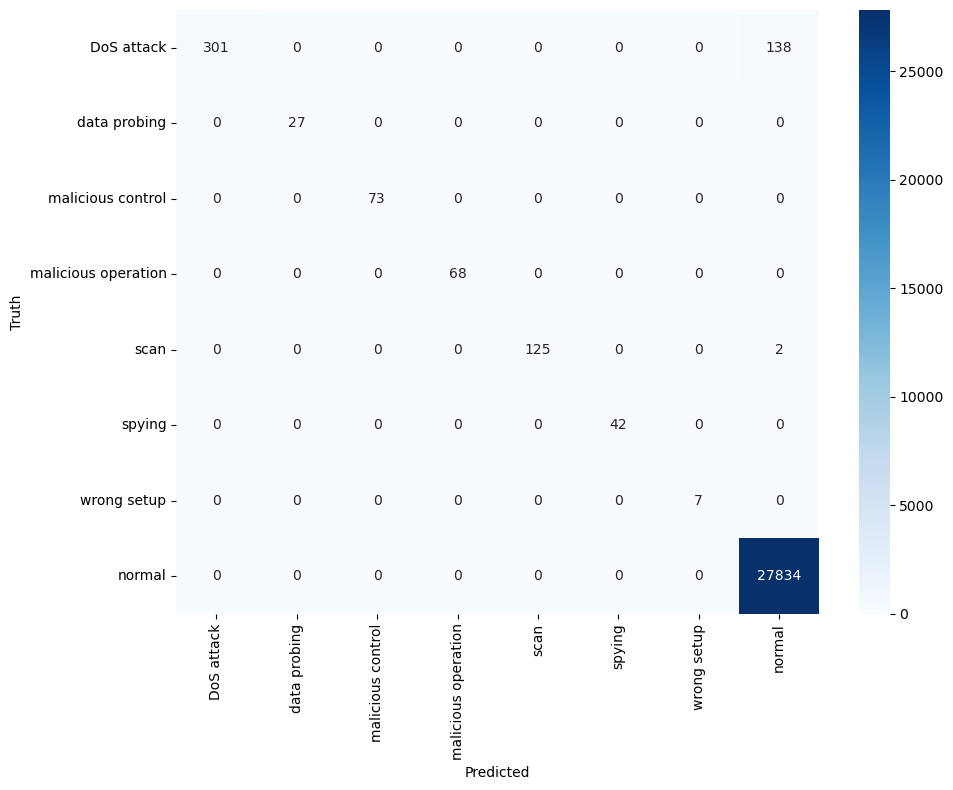

In [79]:
y_train_pred = lr_model.predict(x_train)
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.tight_layout()
plt.savefig('LR_confusionMatrix.png')
plt.show()

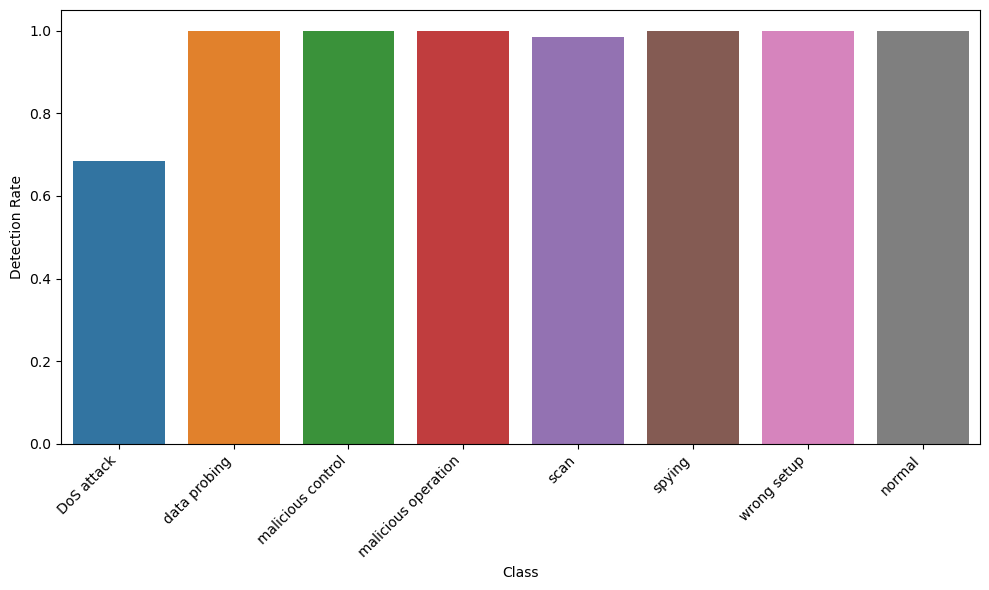

In [80]:
detection_rate=cm.diagonal()/cm.sum(axis=1)
class_labels=list(range(8))
plt.figure(figsize=(10,6))
sns.barplot(x=[class_names[label] for label in class_labels],y=detection_rate)
plt.xlabel('Class')
plt.ylabel('Detection Rate')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.savefig('LR_barplot.png',dpi=300)
plt.show()

Class 0: Precision=1.0,Recall=0.6856492027334852,F1-Score=0.8135135135135134
Class 1: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 2: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 3: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 4: Precision=1.0,Recall=0.984251968503937,F1-Score=0.9920634920634921
Class 5: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 6: Precision=1.0,Recall=1.0,F1-Score=1.0
Class 7: Precision=0.9949953528276256,Recall=1.0,F1-Score=0.9974913990825688


<Figure size 1200x800 with 0 Axes>

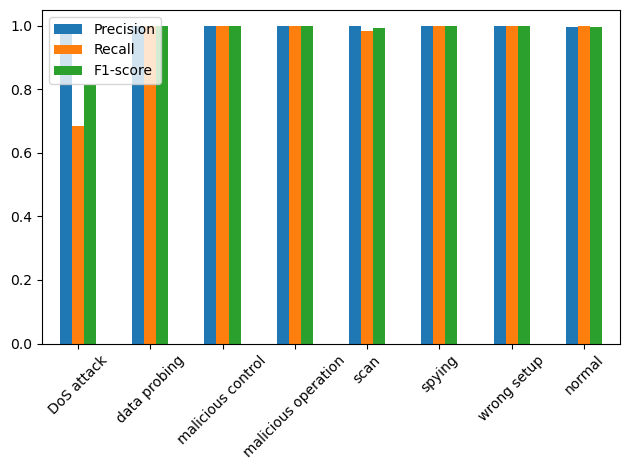

In [81]:
y_train_pred=lr_model.predict(x_train)
precision,recall,f1_score,support=precision_recall_fscore_support(y_train,y_train_pred,average=None)
for i in range(8):
    print(f"Class {i}: Precision={precision[i]},Recall={recall[i]},F1-Score={f1_score[i]}")

df=pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
},index=[class_names[label] for label in range(8)])
plt.figure(figsize=(12,8))
ax=df.plot.bar(rot=45)
plt.tight_layout()
plt.savefig('LR_metrics_barplot.png',dpi=300)
plt.show()

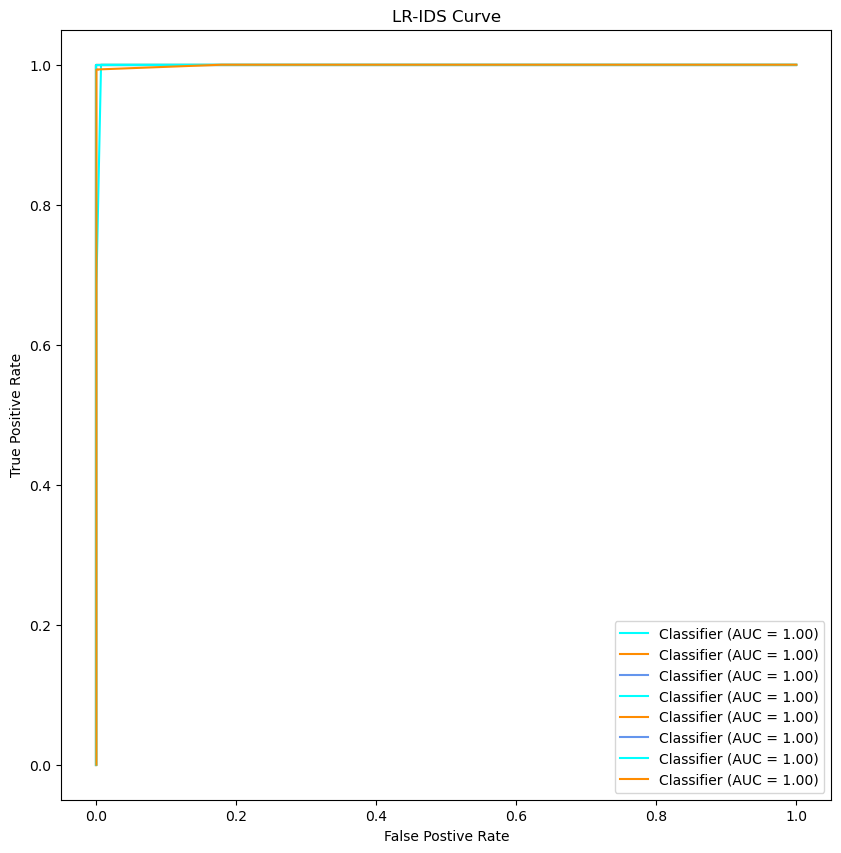

In [82]:
y_train_bin=label_binarize(y_train,classes=[0,1,2,3,4,5,6,7])
y_train_prob=lr_model.predict_proba(x_train)
n_classes=y_train_bin.shape[1]
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_train_bin[:,i],y_train_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    
attack_names={
    0: 'anomalous(DoS attack)',
    1: 'anomalous(data probing)',
    2: 'anomalous(malicious control)',
    3: 'anomalous(malicious operation)',
    4: 'anomalous(scan)',
    5: 'anomalous(spying)',
    6: 'anomalous(wrong setup)',
    7: 'normal',
}

colors=cycle(['aqua','darkorange','cornflowerblue'])
fig,ax=plt.subplots(figsize=(10,10))
for i,color in zip(range(n_classes),colors):
    RocCurveDisplay.from_predictions(
    y_train_bin[:,i],
    y_train_prob[:,i],
    color=color,
    ax=ax,
    )
plt.axis("square")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("LR-IDS Curve")
plt.legend(loc="lower right")
fig.savefig("LR-IDS.png")
plt.show()